# Diabetic Retinopathy Binary Classification using Inception V3 Fine Tuning
## Input:
##### 1) Set up connection of Google Colab to Google Drive or comment out section for use on local computer
##### 2) Set up use of GPU for processing
##### 3) Set up directoy paths and excpected size of data
##### 4) Make sure the designated folder has data in the format of train/val/test with folders of resized_0 for healthy images and resized_1 for the folder of sick eyes. Original data can be found at https://www.kaggle.com/c/diabetic-retinopathy-detection/data

## Output:
##### 1) Fine-tuned Inception V3 is created
##### 2) JSON file with Accuracy and Cross Entrophy Loss based on Training and Validation Set

## Prints
#### 1) Metrics of overall validation set accuracy, validation set confusion matrix, and accuracy for class 0 and class 1.
#### 2) Validation metrics are shared for test set
#### 3) Printed training loss and accuracy across epochs of training

# Setup

In [1]:
# Keras
import keras
from keras import metrics

# File and Folder Management
import os, shutil

# Store history
import json

Using TensorFlow backend.


2.2.5






This notebook contains the code sample found in Chapter 5, Section 2 of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Set directory
directory = "/content/drive/My Drive/colab/"

# Local Computer
#aaron_dir = '../SML_Project_Data'
#directory = aaron_dir

# Directory for inspecting train/val or test set
#directory = "/content/drive/My Drive/colab/data_binary_full_0/train"

#-------- Model ---------
### binary_data_full_0
inception_saved_model_name = '/inception_binary_dim_500_class_full_0_v2.h5'
### binary_data_full_0
#inception_saved_model_name = '/inception_binary_dim_500_class_full_0.h5'
### binary_data_4
#inception_saved_model_name = '/inception_binary_dim_500_class_4.h5'
### binary_data_all_random
#inception_saved_model_name = '/inception_binary_dim_500_class_all_rand.h5'
### binary_data_all
#inception_saved_model_name = '/inception_binary_dim_500_class_all.h5'
### 256
#inception_saved_model_name = '/inception_binary_dim_256_class_crop.h5'

#--------- History ------
### binary_data_full_0
history_file_name = 'binary_binary_data_full_0_history'
### binary_data_4
#history_file_name = 'binary_data_4_history'
### binary_data_all_random
#history_file_name = 'binary_all_rand_inception_history'
### binary_data_all
#history_file_name = 'binary_all_inception_history'
### 256
#history_file_name = 'binary_256_inception_history'

#------ Data Folder ----
### binary_data_full_0
data_folder_name = 'data_binary_full_0'
### binary_data_4
#data_folder_name = 'binary_data_4'
### binary_data_all_random
#data_folder_name = 'data_binary_all_random'
### binary_data_all
#data_folder_name = 'binary_data_all'
### 256
#data_folder_name = 'data_binary_crop'

#------- Dimensions ----
### binary_data_all_random
### binary_data_all
x = 500
y = 500
### 256
#x = 256
#y = 256


#--------- Count --------
### binary_data_full_0
training_data_count = 51336 # 25668 * 2
validation_data_count = 142 # 71*2
### binary_data_4
#training_data_count = 1132 # 566 * 2
#validation_data_count = 142 # 71*2
### binary_data_all_random
#training_data_count = 14908 # 7454 * 2
#validation_data_count = 1862 # 931 * 2
### binary_data_all
#training_data_count = 17496 # 8748*2
#validation_data_count = 568 # 284*2
### 256
#training_data_count = 14632
#validation_data_count = 2000

#--------- ROC Curve --------
### binary_data_full_0
roc_title = 'Receiver Operating Characteristics - Inception v3 - All Healthy versus Disease Class 4'
### data_binary_4
#roc_title = 'Receiver Operating Characteristics - Inception v3 - Healthy versus Disease Class 4'
### binary_data_all
#roc_title = 'Receiver Operating Characteristics - Inception v3 - Healthy versus Diseased'


In [101]:
!pwd
os.chdir(directory)
!ls

/content/drive/My Drive/colab
data_binary_full_0  history  inception_binary_dim_500_class_full_0.h5


In [0]:
#!mv resized_4 resized_1

In [0]:
#!unzip -qq resized_0.zip

In [0]:
#!unzip -qq resized_1.zip

In [0]:
#rm -rf __MACOSX

# Create Directories

In [102]:
# Directory of training data
original_base_dir = directory

base_dir = original_base_dir + "/" + data_folder_name

try:
    os.mkdir(base_dir)
except FileExistsError:
  print('Folder Already Exists \n')
else:
  print('Creating Folder \n')

Folder Already Exists 



In [0]:
history_dir = directory + '/history'

train_dir = os.path.join(directory, data_folder_name, 'train')
val_dir = os.path.join(directory, data_folder_name, 'val')

train_0_dir = os.path.join(train_dir, 'resized_0')
train_1_dir = os.path.join(train_dir, 'resized_1')

val_0_dir = os.path.join(val_dir, 'resized_0')
val_1_dir = os.path.join(val_dir, 'resized_1')

def create_folder(path):
  print('Looking to create folder of', path)
  try:
      os.mkdir(path)
  except FileExistsError:
    print('Folder Already Exists \n')
  else:
    print('Creating Folder \n')

In [104]:
history_dir = directory + '/history'
create_folder(history_dir)

Looking to create folder of /content/drive/My Drive/colab//history
Folder Already Exists 



In [105]:
# Create all Train and Validate Folders in Data with Folders for each Class
for data_type in ('train', 'val', 'test'):
  for disease in (0, 1):
    path = directory + '/' + data_folder_name + '/' + data_type + '/resized_' + str(disease)
    create_folder(path)

Looking to create folder of /content/drive/My Drive/colab//data_binary_full_0/train/resized_0
Folder Already Exists 

Looking to create folder of /content/drive/My Drive/colab//data_binary_full_0/train/resized_1
Folder Already Exists 

Looking to create folder of /content/drive/My Drive/colab//data_binary_full_0/val/resized_0
Folder Already Exists 

Looking to create folder of /content/drive/My Drive/colab//data_binary_full_0/val/resized_1
Folder Already Exists 

Looking to create folder of /content/drive/My Drive/colab//data_binary_full_0/test/resized_0
Folder Already Exists 

Looking to create folder of /content/drive/My Drive/colab//data_binary_full_0/test/resized_1
Folder Already Exists 



In [0]:
from keras import layers
from keras import models

## Data preprocessing

In [107]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

batch_size = 256

train_generator = datagen.flow_from_directory(
        train_dir,
        target_size=(x, y),
        batch_size=batch_size,
        class_mode='binary')

### binary_data_full_0
#training_data_count = 51336 # 25668 * 2
### data_binary_4
# 1132 # 566 * 2
### 566 Classification
# 2830/5=566
### binary_data_all_rand
# 14908
### binary_data_all
# 17496/2=8748
### 256
# 14632/2= 7317

validation_generator = datagen.flow_from_directory(
        val_dir,
        target_size=(x, y),
        batch_size=batch_size,
        class_mode='binary',
        shuffle = False)
### binary_data_full_0
# 142 # 71*2
### data_binary_4
# 142 # 71*2
### 566 Classification
# 355/5=71
### binary_data_all_rand
# 1862 = 932*2
### binary_data_all
# 568/2=284
### 256
# 2000/2 = 1000

# View class labels
print('View class labels', train_generator.class_indices)

Found 51336 images belonging to 2 classes.
Found 142 images belonging to 2 classes.
View class labels {'resized_0': 0, 'resized_1': 1}


# Create Classification InceptionV3 Model

In [0]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras import backend as K
from keras.layers import Dropout, Dense, GlobalAveragePooling2D

In [109]:
model = models.Sequential()

# Source of inspiration for code
# https://keras.io/applications/#inceptionv3

# create the base pre-trained model
model.add(InceptionV3(weights='imagenet', include_top=False))
for layer in model.layers:
    layer.trainable = False

# Add a Global Average Pooling Layer
model.add(GlobalAveragePooling2D())

# Add fully connected layer
model.add(Dense(524, activation='relu'))

# Add dropout layer
model.add(Dropout(0.5))

# Add output layer
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, None, None, 2048)  21802784  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 2048)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 524)               1073676   
_________________________________________________________________
dropout_3 (Dropout)          (None, 524)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 525       
Total params: 22,876,985
Trainable params: 1,074,201
Non-trainable params: 21,802,784
_________________________________________________________________


In [0]:
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='binary_crossentropy', metrics=['acc'])

from keras.callbacks import ModelCheckpoint, EarlyStopping
import math

In [111]:
inception_filepath = original_base_dir + inception_saved_model_name
inception_checkpoint = ModelCheckpoint(inception_filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
inception_es = EarlyStopping(monitor='val_acc', mode='max', patience = 5)

inception_callbacks_list = [inception_checkpoint, inception_es]

inception_history = model.fit_generator(train_generator,
                                 steps_per_epoch=math.ceil(training_data_count/batch_size),
        epochs=50,
        validation_data=validation_generator,
        validation_steps=math.ceil(validation_data_count/batch_size),
        callbacks=inception_callbacks_list,
                                  verbose = 1
                                 )

# Get the dictionary containing each metric and the loss for each epoch and save file
history_dict = inception_history.history
json.dump(history_dict, open(history_dir + '/' + history_file_name, 'w'))

Epoch 1/50
402/402 [==============================] - 574s 1s/step - loss: 0.6579 - acc: 0.6101 - val_loss: 0.6561 - val_acc: 0.6197

Epoch 00001: val_acc improved from -inf to 0.61972, saving model to /content/drive/My Drive/colab//inception_binary_dim_500_class_full_0_v2.h5
Epoch 2/50
402/402 [==============================] - 551s 1s/step - loss: 0.5572 - acc: 0.7504 - val_loss: 0.6203 - val_acc: 0.7183

Epoch 00002: val_acc improved from 0.61972 to 0.71831, saving model to /content/drive/My Drive/colab//inception_binary_dim_500_class_full_0_v2.h5
Epoch 3/50
402/402 [==============================] - 513s 1s/step - loss: 0.4991 - acc: 0.7953 - val_loss: 0.5924 - val_acc: 0.7606

Epoch 00003: val_acc improved from 0.71831 to 0.76056, saving model to /content/drive/My Drive/colab//inception_binary_dim_500_class_full_0_v2.h5
Epoch 4/50
402/402 [==============================] - 514s 1s/step - loss: 0.4606 - acc: 0.8158 - val_loss: 0.5715 - val_acc: 0.7958

Epoch 00004: val_acc improved

In [139]:
from keras.models import load_model
model_inception = load_model(original_base_dir + inception_saved_model_name)

model_inception.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='binary_crossentropy', metrics=['acc'])

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:350: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [120]:
# Import saved history
with open(original_base_dir + '/history/' + history_file_name) as json_file:
    history = json.load(json_file)
history.get('val_acc')

[0.6197183098591549,
 0.7183098591549296,
 0.7605633802816901,
 0.795774647887324,
 0.8169014084507042,
 0.8169014084507042,
 0.823943661971831,
 0.8169014084507042,
 0.8098591557690795,
 0.8098591557690795,
 0.8098591557690795,
 0.8098591557690795]

In [0]:
len(history.get('val_acc'))

38

# Plot Training Process across Epochs

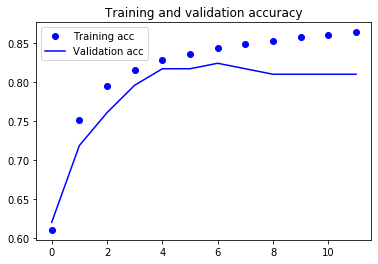

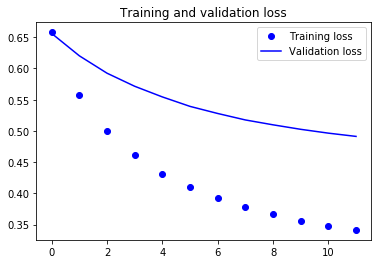

In [138]:
import matplotlib.pyplot as plt

acc = history['acc']
val_acc = history['val_acc']
loss = history['loss']
val_loss = history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Model Evaluation

In [0]:
def calculate_binary_accuracy(prediction, actual):

  true_positive = 0
  true_negative = 0
  false_positive = 0
  false_negative = 0

  for pred, act in zip(prediction, actual):
    if pred >= .5 and act == 1:
      true_positive += 1
    elif pred < .5 and act == 1:
      false_negative += 1
    elif pred < .5 and act == 0:
      true_negative += 1
    elif pred >= .5 and act == 0:
      false_positive += 1
    else:
      print('Some error', pred, act)

  total = true_positive + true_negative + false_positive + false_negative
  print('Total processes images are', total)
  print(true_positive, true_negative, false_positive, false_negative)
  print('Accuracy is ', (true_positive + true_negative) / total)
  print('Accuracy for class 1 images', true_positive / (true_positive + false_negative))
  print('Accuracy for class 0 images', true_negative / (false_positive + true_negative))
  print('Predicts class 1 a percentage of', (true_positive + false_positive) / total)
  print('Predicts class 0 a percentage of', (true_negative + false_negative) / total)

  # Precision of class 1
  print('Precision of class 1', true_positive / (true_positive + false_positive))

  # Recall of class 1
  print('Recall of class 1', true_positive / (true_positive + false_negative))


In [115]:
validation_generator.reset() # Makes sure that the same ordered data is used for prediction and actual
Y_pred = model_inception.predict_generator(validation_generator)
calculate_binary_accuracy(prediction=Y_pred, actual=validation_generator.classes)

Total processes images are 142
57 60 11 14
Accuracy is  0.823943661971831
Accuracy for class 1 images 0.8028169014084507
Accuracy for class 0 images 0.8450704225352113
Predicts class 1 a percentage of 0.4788732394366197
Predicts class 0 a percentage of 0.5211267605633803
Precision of class 1 12.0
Recall of class 1 15.0


# Testing Evaluation

In [116]:
test_dir = os.path.join(directory, data_folder_name, 'test')

testing_generator = datagen.flow_from_directory(
        test_dir,
        target_size=(x, y),
        batch_size=20,
        class_mode='binary',
        shuffle = False
        )

Found 142 images belonging to 2 classes.


In [0]:
testing_generator.reset() # Makes sure that the same ordered data is used for prediction and actual
Y_pred = model_inception.predict_generator(testing_generator)

actual_results=testing_generator.classes

In [118]:
calculate_binary_accuracy(prediction=Y_pred, actual=actual_results)

Total processes images are 142
48 62 9 23
Accuracy is  0.7746478873239436
Accuracy for class 1 images 0.676056338028169
Accuracy for class 0 images 0.8732394366197183
Predicts class 1 a percentage of 0.4014084507042254
Predicts class 0 a percentage of 0.5985915492957746
Precision of class 1 10.0
Recall of class 1 24.0


# ROC Curve

In [0]:
# Assistance on generating ROC curve
# https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

Inception V3: ROC AUC 0.86550287641341


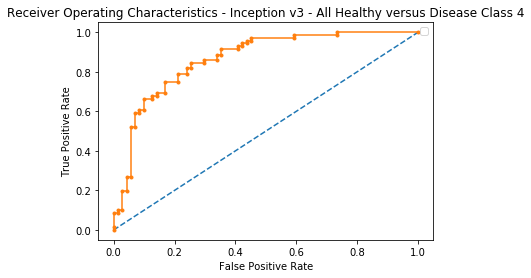

In [136]:
# ROC AUC
model_auc = roc_auc_score(testing_generator.classes, Y_pred)
print('Inception V3: ROC AUC', model_auc)

# Print ROC Curves
dividing_line_probs = [0 for x in range(len(testing_generator.classes))]
dividing_line_false_positive_rate, dividing_line_true_positive_rate, none = roc_curve(testing_generator.classes, dividing_line_probs)
model_false_positive_rate, model_true_positive_rate, none = roc_curve(testing_generator.classes, Y_pred)
pyplot.plot(dividing_line_false_positive_rate, dividing_line_true_positive_rate, linestyle='--')
pyplot.plot(model_false_positive_rate, model_true_positive_rate, marker='.')

pyplot.title(roc_title)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()